# BTC Price Analysis

###### Import all dependencies

In [2]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
exec(requests.get('https://raw.githubusercontent.com/NumericCamel/PythonScripts/main/investing_com_btc_clean.py').text)

In [3]:
url = 'https://raw.githubusercontent.com/NumericCamel/PythonScripts/main/investing_com_btc_clean.py'

response = requests.get(url)
script_content = response.text
#print(script_content)

with open('investing_com_btc_clean.py', 'w') as file:
    file.write(script_content)

# Step 2: Import the Saved Script as a Module
import investing_com_btc_clean

In [45]:
btc = pd.read_csv('data/investing_btc.csv')
btc_1 = investing_com_btc_clean.clean_dataset(btc)
btc_1 = btc_1.sort_values(by='Date').reset_index(drop=True)
btc_1

Date    Price     Open     High      Low    Volume  pct_change
0    2011-01-01      0.3      0.3      0.3      0.3    2820.0      0.0000
1    2011-01-02      0.3      0.3      0.3      0.3    5350.0      0.0000
2    2011-01-03      0.3      0.3      0.3      0.3    1430.0      0.0000
3    2011-01-04      0.3      0.3      0.3      0.3    1880.0      0.0000
4    2011-01-05      0.3      0.3      0.3      0.3     360.0      0.0000
...         ...      ...      ...      ...      ...       ...         ...
4930 2024-07-01  62890.1  62768.8  63842.1  62558.0   59940.0      0.0022
4931 2024-07-02  62103.3  62888.3  63257.0  61797.6   46520.0     -0.0125
4932 2024-07-03  60199.3  62104.9  62263.6  59466.6   73340.0     -0.0307
4933 2024-07-04  57026.3  60201.4  60463.0  56812.7  116380.0     -0.0527
4934 2024-07-05  55239.5  57025.7  57471.1  53883.4  160760.0     -0.0313

[4935 rows x 7 columns]

In [46]:
import numpy as np
import pandas as pd
from scipy import stats

def enhanced_technical_analysis(df):
    ta = df.copy()
    
    # Existing indicators
    ta = calculate_moving_averages(ta)
    ta = calculate_stochastic(ta)
    ta = calculate_rsi(ta)
    ta = calculate_momentum(ta)
    ta = calculate_macd(ta)
    ta = calculate_cci(ta)
    ta = calculate_bollinger_bands(ta)
    
    # New indicators
    ta = calculate_atr(ta)
    ta = calculate_obv(ta)
    ta = calculate_vwap(ta)
    ta = calculate_fibonacci_retracement(ta)
    ta = calculate_ichimoku_cloud(ta)
    
    # Custom indicators
    ta = calculate_price_momentum_oscillator(ta)
    ta = calculate_volatility_ratio(ta)
    ta = calculate_trend_strength_index(ta)
    
    return ta

def calculate_moving_averages(ta):
    # 10D MA
    ta['MA10'] = ta.Price.rolling(window=10).mean()
    ta['MA10_td'] = (ta.Price > ta.MA10).astype(int)
    
    # 30D MA
    ta['MA30'] = ta.Price.rolling(window=30).mean()
    ta['MA30_td'] = (ta.Price > ta.MA30).astype(int)
    
    # 50D MA
    ta['MA50'] = ta.Price.rolling(window=50).mean()
    ta['MA50_td'] = (ta.Price > ta.MA50).astype(int)
    
    return ta

def calculate_stochastic(ta):
    # %K
    lowest_low = ta.Low.rolling(window=14).min()
    highest_high = ta.High.rolling(window=14).max()
    ta['%K'] = (ta.Price - lowest_low) / (highest_high - lowest_low) * 100
    ta['%K_td'] = (ta['%K'] > ta['%K'].shift(1)).astype(int)
    
    # %D
    ta['%D'] = ta['%K'].rolling(window=3).mean()
    ta['%D_td'] = (ta['%D'] > ta['%D'].shift(1)).astype(int)
    
    return ta

def calculate_rsi(ta, window=14):
    delta = ta.Price.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    ta['RSI'] = 100 - (100 / (1 + rs))
    
    ta['RSI_td'] = np.select([ta.RSI >= 70, ta.RSI <= 30], [-1, 1], 0)
    
    return ta

def calculate_momentum(ta, window=10):
    ta['Momentum'] = ta.Price - ta.Price.shift(window)
    ta['Momentum_td'] = (ta.Momentum > 0).astype(int)
    return ta

def calculate_macd(ta):
    ta['EMA12'] = ta.Price.ewm(span=12, adjust=False).mean()
    ta['EMA26'] = ta.Price.ewm(span=26, adjust=False).mean()
    ta['MACD'] = ta['EMA12'] - ta['EMA26']
    ta['Signal'] = ta['MACD'].ewm(span=9, adjust=False).mean()
    ta['MACD_td'] = (ta['MACD'] > ta['Signal']).astype(int)
    return ta

def calculate_cci(ta, window=20):
    ta['TP'] = (ta['High'] + ta['Low'] + ta['Price']) / 3
    ta['SMA_TP'] = ta['TP'].rolling(window=window).mean()
    ta['MD'] = ta['TP'].rolling(window=window).apply(lambda x: np.abs(x - x.mean()).mean())
    ta['CCI'] = (ta['TP'] - ta['SMA_TP']) / (0.015 * ta['MD'])
    ta['CCI_td'] = np.select([ta.CCI >= 100, ta.CCI <= -100], [-1, 1], 0)
    return ta

def calculate_bollinger_bands(ta, window=20, num_std=2):
    ta['MA'] = ta['Price'].rolling(window=window).mean()
    ta['STD'] = ta['Price'].rolling(window=window).std()
    ta['Upper_BB'] = ta['MA'] + (ta['STD'] * num_std)
    ta['Lower_BB'] = ta['MA'] - (ta['STD'] * num_std)
    ta['BB_td'] = np.select([ta.Price > ta.Upper_BB, ta.Price < ta.Lower_BB], [0, 1], np.nan)
    ta['BB_td'] = ta['BB_td'].ffill()
    return ta

def calculate_atr(ta, window=14):
    high_low = ta['High'] - ta['Low']
    high_close = np.abs(ta['High'] - ta['Price'].shift())
    low_close = np.abs(ta['Low'] - ta['Price'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = np.max(ranges, axis=1)
    ta['ATR'] = true_range.rolling(window=window).mean()
    return ta

def calculate_obv(ta):
    ta['OBV'] = (np.sign(ta['Price'].diff()) * ta['Volume']).cumsum()
    ta['OBV_td'] = (ta['OBV'] > ta['OBV'].shift(1)).astype(int)
    return ta

def calculate_vwap(ta):
    ta['VWAP'] = (ta['Price'] * ta['Volume']).cumsum() / ta['Volume'].cumsum()
    ta['VWAP_td'] = (ta['Price'] > ta['VWAP']).astype(int)
    return ta

def calculate_fibonacci_retracement(ta):
    high = ta['Price'].max()
    low = ta['Price'].min()
    diff = high - low
    ta['Fib_23.6'] = high - 0.236 * diff
    ta['Fib_38.2'] = high - 0.382 * diff
    ta['Fib_50.0'] = high - 0.5 * diff
    ta['Fib_61.8'] = high - 0.618 * diff
    return ta

def calculate_ichimoku_cloud(ta):
    high_9 = ta['High'].rolling(window=9).max()
    low_9 = ta['Low'].rolling(window=9).min()
    ta['Tenkan_sen'] = (high_9 + low_9) / 2
    
    high_26 = ta['High'].rolling(window=26).max()
    low_26 = ta['Low'].rolling(window=26).min()
    ta['Kijun_sen'] = (high_26 + low_26) / 2
    
    ta['Senkou_span_A'] = ((ta['Tenkan_sen'] + ta['Kijun_sen']) / 2).shift(26)
    ta['Senkou_span_B'] = ((ta['High'].rolling(window=52).max() + ta['Low'].rolling(window=52).min()) / 2).shift(26)
    
    ta['Chikou_span'] = ta['Price'].shift(-26)
    
    return ta

def calculate_price_momentum_oscillator(ta, short_window=10, long_window=30):
    short_momentum = ta['Price'] - ta['Price'].shift(short_window)
    long_momentum = ta['Price'] - ta['Price'].shift(long_window)
    ta['PMO'] = short_momentum / long_momentum
    ta['PMO_td'] = (ta['PMO'] > 1).astype(int)
    return ta

def calculate_volatility_ratio(ta, window=20):
    log_return = np.log(ta['Price'] / ta['Price'].shift(1))
    ta['Volatility'] = log_return.rolling(window=window).std() * np.sqrt(252)
    ta['Volatility_Ratio'] = ta['Volatility'] / ta['Volatility'].rolling(window=window).mean()
    ta['Volatility_Ratio_td'] = (ta['Volatility_Ratio'] > 1).astype(int)
    return ta

def calculate_trend_strength_index(ta, window=14):
    price_change = ta['Price'].diff()
    directional_movement = np.abs(price_change)
    atr = calculate_atr(ta, window)['ATR']
    ta['TSI'] = (directional_movement.rolling(window=window).sum() / (atr * window)) * 100
    ta['TSI_td'] = (ta['TSI'] > ta['TSI'].shift(1)).astype(int)
    return ta

In [47]:
camel_btc = enhanced_technical_analysis(btc_1)
camel_btc.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'pct_change', 'MA10',
       'MA10_td', 'MA30', 'MA30_td', 'MA50', 'MA50_td', '%K', '%K_td', '%D',
       '%D_td', 'RSI', 'RSI_td', 'Momentum', 'Momentum_td', 'EMA12', 'EMA26',
       'MACD', 'Signal', 'MACD_td', 'TP', 'SMA_TP', 'MD', 'CCI', 'CCI_td',
       'MA', 'STD', 'Upper_BB', 'Lower_BB', 'BB_td', 'ATR', 'OBV', 'OBV_td',
       'VWAP', 'VWAP_td', 'Fib_23.6', 'Fib_38.2', 'Fib_50.0', 'Fib_61.8',
       'Tenkan_sen', 'Kijun_sen', 'Senkou_span_A', 'Senkou_span_B',
       'Chikou_span', 'PMO', 'PMO_td', 'Volatility', 'Volatility_Ratio',
       'Volatility_Ratio_td', 'TSI', 'TSI_td'],
      dtype='object')

### K-Means Clustering to find support and resistance levels

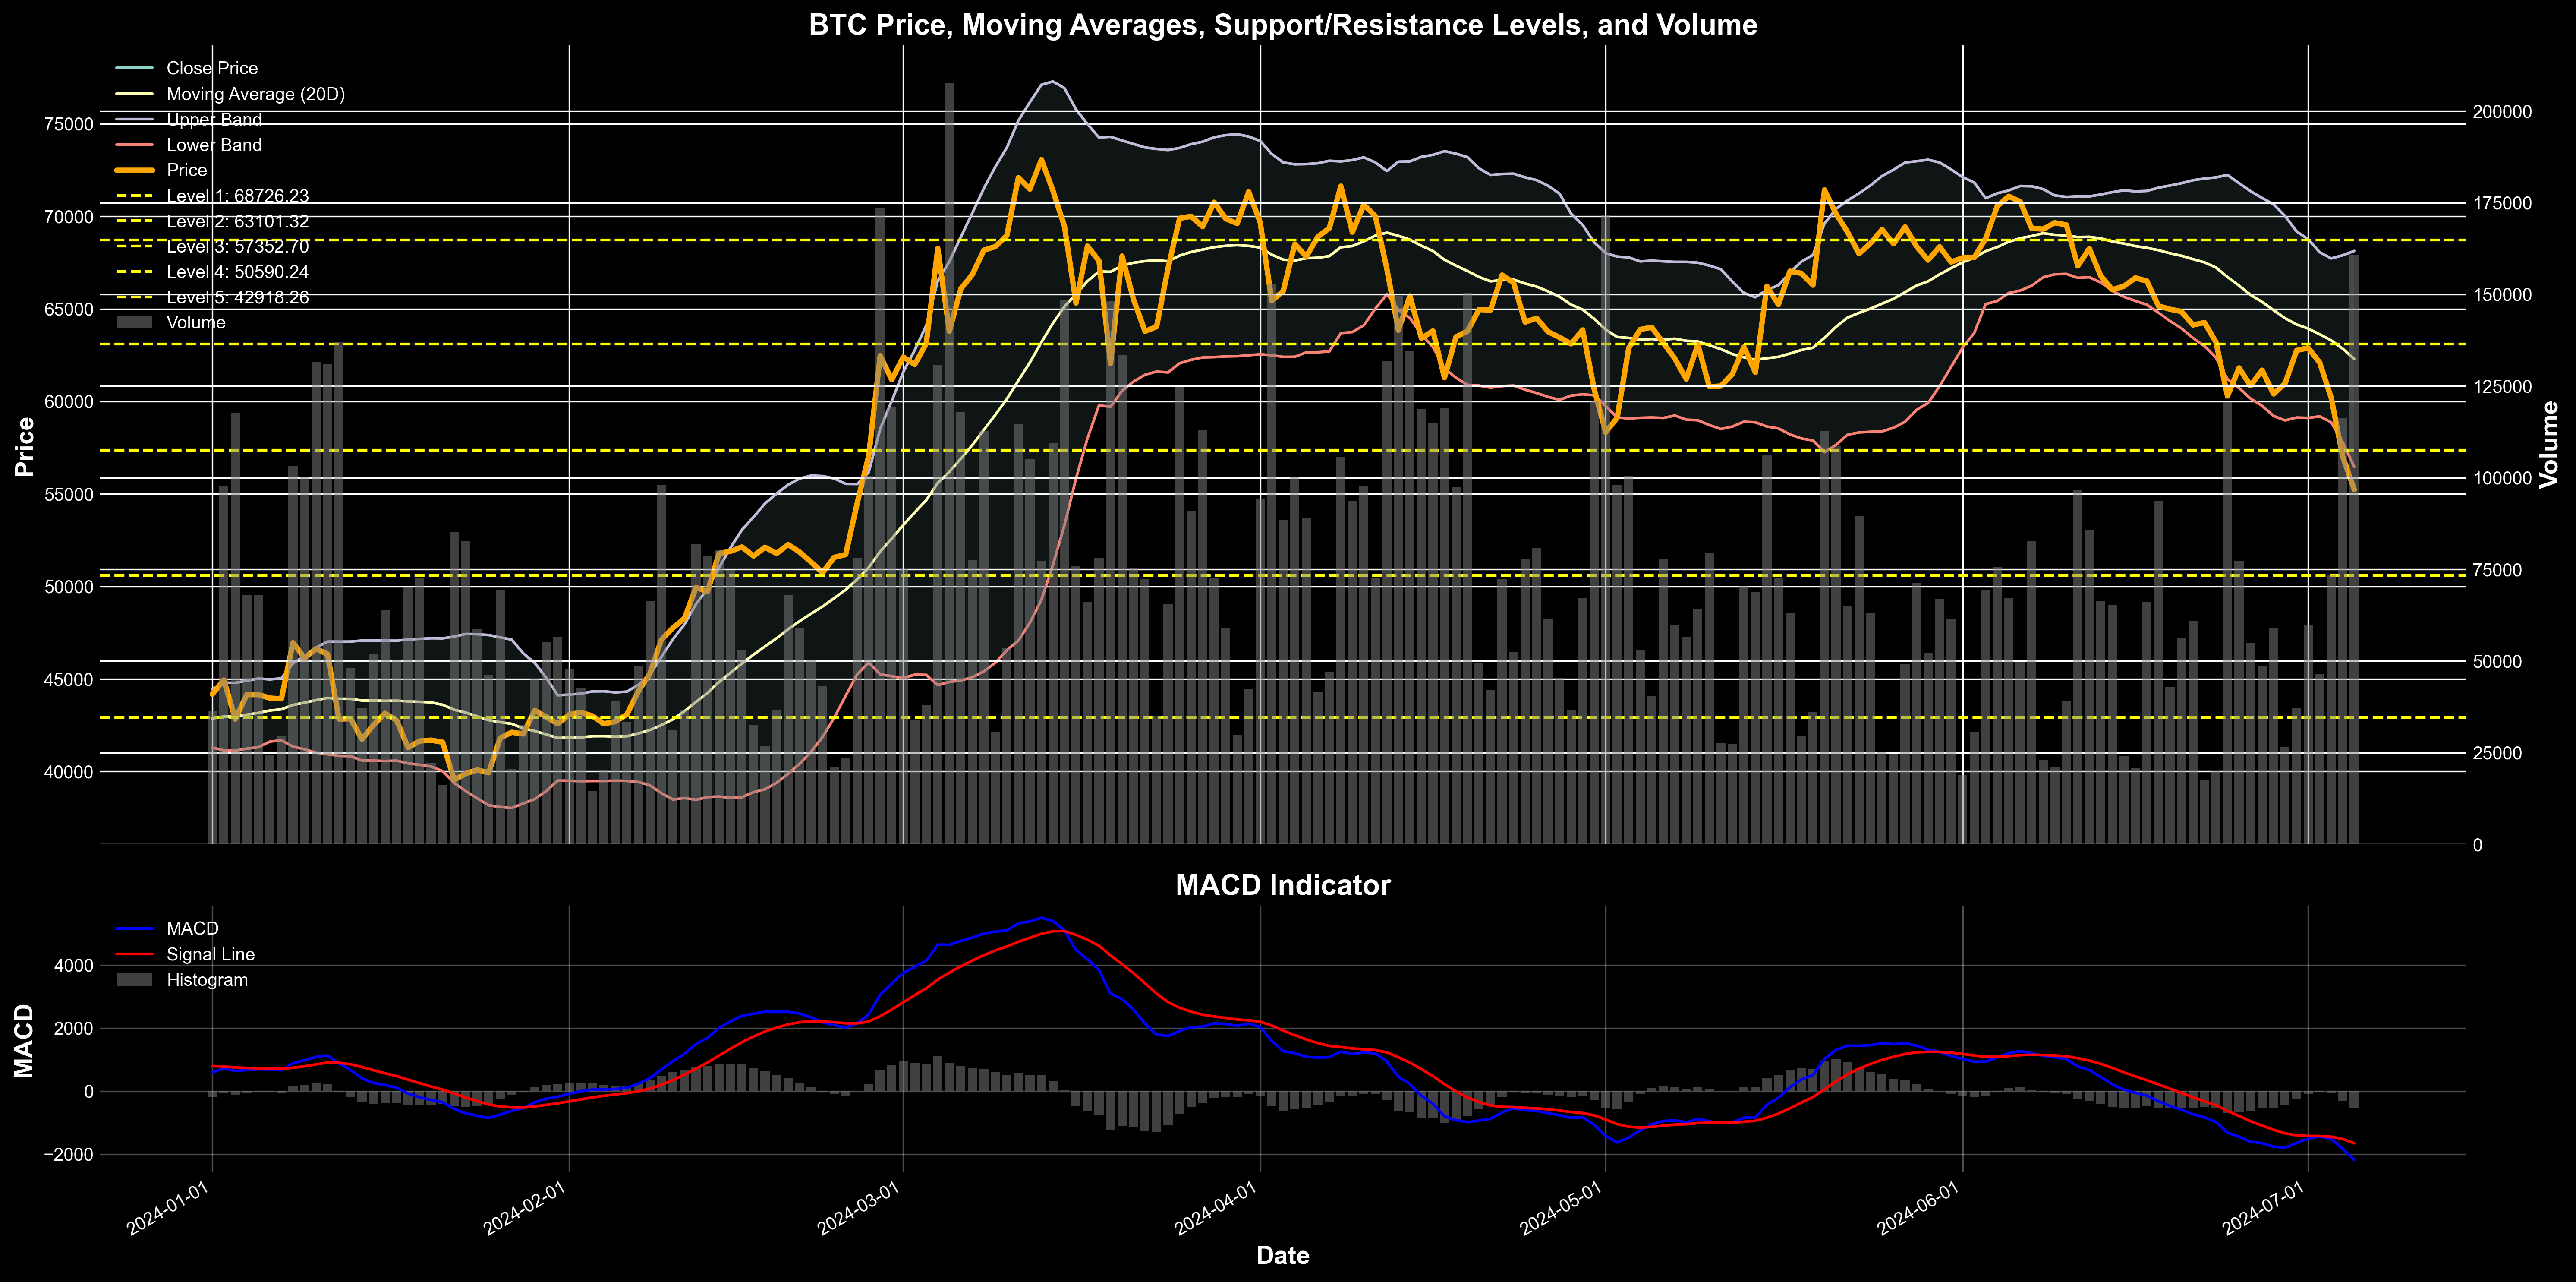

In [48]:
import matplotlib.dates as mdates


# Filter the data for the year 2024
btc_graph = camel_btc[(camel_btc['Date'].dt.year == 2024) & (camel_btc['Date'].dt.month >= 1)]

# Extract the 'Price' column for clustering
prices = btc_graph['Price'].values.reshape(-1, 1)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(prices)

# Get cluster centers (these can be considered as potential support/resistance levels)
cluster_centers = kmeans.cluster_centers_.flatten()

# Sort the levels for better readability
sorted_centers = sorted(cluster_centers, reverse=True)

# Create a DataFrame for the support and resistance levels with sorted names
support_resistance_df = pd.DataFrame({
    'Level': sorted_centers,
    'Type': [f'Level {i+1}' for i in range(len(sorted_centers))]
})

# Set the style
plt.style.use('dark_background')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), dpi=300, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# First subplot: Price, Moving Averages, Support/Resistance Levels, and Volume

#ax1.plot(btc_graph.Date, btc_graph.MA, label='Moving Average (10D)', color='#00FFFF', linewidth=2)
#ax1.plot(btc_graph.Date, btc_graph['3MA'], label='Moving Average (30D)', color='#FF00FF', linewidth=2)
ax1.plot(btc_graph['Date'], btc_graph['Price'], label='Close Price')
ax1.plot(btc_graph['Date'], btc_graph['MA'], label='Moving Average (20D)')
ax1.plot(btc_graph['Date'], btc_graph['Upper_BB'], label='Upper Band')
ax1.plot(btc_graph['Date'], btc_graph['Lower_BB'], label='Lower Band')
ax1.fill_between(btc_graph['Date'], btc_graph['Upper_BB'], btc_graph['Lower_BB'], alpha=0.1)
ax1.plot(btc_graph.Date, btc_graph.Price, label='Price', color='orange', linewidth=3)

for i, center in enumerate(sorted_centers):
    ax1.axhline(y=center, color='#FFFF00', linestyle='--', label=f'Level {i+1}: {center:.2f}', linewidth=1.5)

ax1.set_ylabel('Price', fontsize=14, fontweight='bold', color='white')
ax1.set_title('BTC Price, Moving Averages, Support/Resistance Levels, and Volume', fontsize=16, fontweight='bold', color='white')
ax1.legend(loc='upper left', fontsize=10)

# Volume on the same subplot
ax1_volume = ax1.twinx()
ax1_volume.bar(btc_graph.Date, btc_graph.Volume, color='#808080', alpha=0.5, label='Volume')
ax1_volume.set_ylabel('Volume', fontsize=14, fontweight='bold', color='white')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_volume.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10)

# Second subplot: MACD
ax2.plot(btc_graph['Date'], btc_graph['MACD'], label='MACD', color='blue')
ax2.plot(btc_graph['Date'], btc_graph['Signal'], label='Signal Line', color='red')
ax2.bar(btc_graph['Date'], btc_graph['MACD'] - btc_graph['Signal'], label='Histogram', color='gray', alpha=0.5)

ax2.set_title('MACD Indicator', fontsize=16, fontweight='bold', color='white')
ax2.set_xlabel('Date', fontsize=14, fontweight='bold', color='white')
ax2.set_ylabel('MACD', fontsize=14, fontweight='bold', color='white')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)

# Format x-axis
plt.gcf().autofmt_xdate()  # Rotation
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax2.xaxis.set_major_formatter(myFmt)

# Adjust layout
plt.tight_layout()

# Show the combined chart
plt.show()

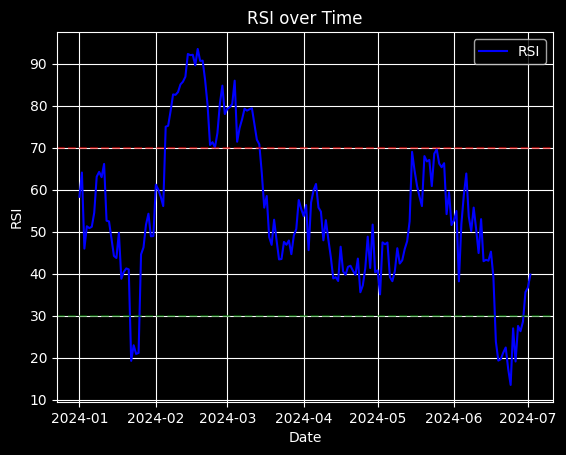

In [26]:
plt.plot(btc_graph['Date'], btc_graph['RSI'], label='RSI', color='blue')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('RSI over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
import matplotlib.dates as mdates
import matplotlib.image as mpimg


# Filter the data for the year 2024
btc_graph = btc_ta[(btc_ta['Date'].dt.year == 2024) & (btc_ta['Date'].dt.month >= 1)]

# Extract the 'Price' column for clustering
prices = btc_graph['Price'].values.reshape(-1, 1)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(prices)

# Get cluster centers (these can be considered as potential support/resistance levels)
cluster_centers = kmeans.cluster_centers_.flatten()

# Sort the levels for better readability
sorted_centers = sorted(cluster_centers, reverse=True)

# Create a DataFrame for the support and resistance levels with sorted names
support_resistance_df = pd.DataFrame({
    'Level': sorted_centers,
    'Type': [f'Level {i+1}' for i in range(len(sorted_centers))]
})

# Set the style
plt.style.use('dark_background')

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(40, 20), dpi=300, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

# First subplot: Price, Moving Averages, Support/Resistance Levels, and Volume

#ax1.plot(btc_graph.Date, btc_graph.MA, label='Moving Average (10D)', color='#00FFFF', linewidth=2)
#ax1.plot(btc_graph.Date, btc_graph['3MA'], label='Moving Average (30D)', color='#FF00FF', linewidth=2)
ax1.plot(btc_graph['Date'], btc_graph['Price'], label='Close Price')
ax1.plot(btc_graph['Date'], btc_graph['MA'], label='Moving Average (20D)')
ax1.plot(btc_graph['Date'], btc_graph['Upper'], label='Upper Band')
ax1.plot(btc_graph['Date'], btc_graph['Lower'], label='Lower Band')
ax1.fill_between(btc_graph['Date'], btc_graph['Upper'], btc_graph['Lower'], alpha=0.1)
ax1.plot(btc_graph.Date, btc_graph.Price, label='Price', color='orange', linewidth=3)

for i, center in enumerate(sorted_centers):
    ax1.axhline(y=center, color='#FFFF00', linestyle='--', label=f'Level {i+1}: {center:.2f}', linewidth=1.5)

ax1.set_ylabel('Price', fontsize=14, fontweight='bold', color='white')
ax1.set_title('BTC Price, Moving Averages, Support/Resistance Levels, and Volume', fontsize=16, fontweight='bold', color='white')
ax1.legend(loc='upper left', fontsize=15)

# Volume on the same subplot
ax1_volume = ax1.twinx()
ax1_volume.bar(btc_graph.Date, btc_graph.Volume, color='#808080', alpha=0.5, label='Volume')
ax1_volume.set_ylabel('Volume', fontsize=14, fontweight='bold', color='white')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_volume.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=10)

# Second subplot: MACD
ax2.plot(btc_graph['Date'], btc_graph['MACD'], label='MACD', color='blue')
ax2.plot(btc_graph['Date'], btc_graph['Signal'], label='Signal Line', color='red')
ax2.bar(btc_graph['Date'], btc_graph['MACD'] - btc_graph['Signal'], label='Histogram', color='gray', alpha=0.5)

ax2.set_title('MACD Indicator', fontsize=16, fontweight='bold', color='white')
ax2.set_xlabel('Date', fontsize=14, fontweight='bold', color='white')
ax2.set_ylabel('MACD', fontsize=14, fontweight='bold', color='white')
ax2.legend(loc='upper left', fontsize=10)
ax2.grid(True, alpha=0.3)

ax3.plot(btc_graph['Date'], btc_graph['RSI'], label='RSI', color='blue')
ax3.axhline(70, linestyle='--', alpha=0.5, color='red')
ax3.axhline(30, linestyle='--', alpha=0.5, color='green')
ax3.set_title('RSI over Time', fontsize=16, fontweight='bold', color='white')
ax3.set_xlabel('Date', fontsize=14, fontweight='bold', color='white')
ax3.set_ylabel('RSI', fontsize=14, fontweight='bold', color='white')
ax3.legend(loc='upper left', fontsize=10)
ax3.grid(True, alpha=0.3)

# Format x-axis
plt.gcf().autofmt_xdate()  # Rotation
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax2.xaxis.set_major_formatter(myFmt)

# Adjust layout
plt.tight_layout()

# Add watermark image
img = mpimg.imread('tweet_outputs/camel.jpg')  # Replace with the path to your watermark image
fig.figimage(
    img,
    xo=fig.bbox.xmax - img.shape[1] - 10,  # 10 pixels from the right edge
    yo=10,  # 10 pixels from the bottom edge
    alpha=1,
    zorder=1
)

# Show the combined chart
plt.show()

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

# Set the style and color palette
plt.style.use('seaborn-darkgrid')
desert_colors = {
    'sand': '#E6CCB2',
    'dune': '#C19A6B',
    'cactus': '#7BA05B',
    'sunset': '#FF7F50',
    'sky': '#87CEEB',
    'night': '#1E1E1E',
    'light' : '#FFFFFF'
}

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(40, 25), dpi=300, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})
fig.patch.set_facecolor(desert_colors['night'])

# First subplot: Price, Moving Averages, Support/Resistance Levels, and Volume
ax1.plot(btc_graph['Date'], btc_graph['Price'], label='Close Price', color=desert_colors['sunset'], linewidth=3)
ax1.plot(btc_graph['Date'], btc_graph['MA'], label='Moving Average (20D)', color=desert_colors['sky'], linewidth=2)
ax1.plot(btc_graph['Date'], btc_graph['Upper'], label='Upper Band', color=desert_colors['cactus'], linewidth=2)
ax1.plot(btc_graph['Date'], btc_graph['Lower'], label='Lower Band', color=desert_colors['cactus'], linewidth=2)
ax1.fill_between(btc_graph['Date'], btc_graph['Upper'], btc_graph['Lower'], color=desert_colors['cactus'], alpha=0.1)

for i, center in enumerate(sorted_centers):
    ax1.axhline(y=center, color=desert_colors['dune'], linestyle='--', label=f'Level {i+1}: {center:.2f}', linewidth=1.5)

ax1.set_ylabel('Price', fontsize=18, fontweight='bold', color=desert_colors['sand'])
ax1.set_title('BTC Price Analysis', fontsize=28, fontweight='bold', color=desert_colors['sand'])

# Volume on the same subplot
ax1_volume = ax1.twinx()
ax1_volume.bar(btc_graph.Date, btc_graph.Volume, color=desert_colors['sand'], alpha=0.3, label='Volume')
ax1_volume.set_ylabel('Volume', fontsize=18, fontweight='bold', color=desert_colors['sand'])

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_volume.get_legend_handles_labels()
legend1 = ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=14, 
                     facecolor=desert_colors['night'], edgecolor=desert_colors['sand'], 
                     labelcolor=desert_colors['sand'])
legend1.get_frame().set_alpha(0.8)

# Second subplot: MACD
ax2.plot(btc_graph['Date'], btc_graph['MACD'], label='MACD', color=desert_colors['sky'], linewidth=2)
ax2.plot(btc_graph['Date'], btc_graph['Signal'], label='Signal Line', color=desert_colors['sunset'], linewidth=2)
ax2.bar(btc_graph['Date'], btc_graph['MACD'] - btc_graph['Signal'], label='Histogram', color=desert_colors['sand'], alpha=0.5)

ax2.set_title('MACD Indicator', fontsize=24, fontweight='bold', color=desert_colors['sand'])
ax2.set_xlabel('Date', fontsize=18, fontweight='bold', color=desert_colors['sand'])
ax2.set_ylabel('MACD', fontsize=18, fontweight='bold', color=desert_colors['sand'])
legend2 = ax2.legend(loc='upper left', fontsize=14, facecolor=desert_colors['night'], 
                     edgecolor=desert_colors['sand'], labelcolor=desert_colors['sand'])
legend2.get_frame().set_alpha(0.8)
ax2.grid(True, alpha=0.3, color=desert_colors['sand'])

# Third subplot: RSI
ax3.plot(btc_graph['Date'], btc_graph['RSI'], label='RSI', color=desert_colors['cactus'], linewidth=2)
ax3.axhline(70, linestyle='--', alpha=0.5, color=desert_colors['sunset'])
ax3.axhline(30, linestyle='--', alpha=0.5, color=desert_colors['sky'])
ax3.fill_between(btc_graph['Date'], 30, 70, color=desert_colors['sand'], alpha=0.1)

ax3.set_title('RSI over Time', fontsize=24, fontweight='bold', color=desert_colors['sand'])
ax3.set_xlabel('Date', fontsize=18, fontweight='bold', color=desert_colors['sand'])
ax3.set_ylabel('RSI', fontsize=18, fontweight='bold', color=desert_colors['sand'])
legend3 = ax3.legend(loc='upper left', fontsize=14, facecolor=desert_colors['night'], 
                     edgecolor=desert_colors['sand'], labelcolor=desert_colors['sand'])
legend3.get_frame().set_alpha(0.8)
ax3.grid(True, alpha=0.3, color=desert_colors['sand'])

# Format x-axis
plt.gcf().autofmt_xdate()  # Rotation
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax3.xaxis.set_major_formatter(myFmt)

# Adjust layout
plt.tight_layout()

# Add watermark text
fig.text(0.5, 0.5, 'Camel Quant', fontsize=60, color=desert_colors['sand'], 
         ha='center', va='center', alpha=0.35, fontweight='bold', 
         fontfamily='garamond', style='italic')

# Add camel silhouette as watermark
camel_img = mpimg.imread('tweet_outputs/camel.jpg')  # Replace with the path to your camel silhouette image
camel_img = np.mean(camel_img, axis=2)  # Convert to grayscale
imagebox = OffsetImage(camel_img, zoom=0.15, alpha=0.1)
ab = AnnotationBbox(imagebox, (0.85, 0.15), xycoords='figure fraction', frameon=False)
fig.add_artist(ab)

# Custom styling for all subplots
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor(desert_colors['night'])
    ax.tick_params(colors=desert_colors['sand'], which='both', labelsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor(desert_colors['sand'])

# Show the combined chart
plt.show()

C:\Users\mulle\AppData\Local\Temp\ipykernel_9912\4279195939.py:8: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



### LSTM Prediction of next 14 days

In [51]:
camel_btc.tail(4)

Date    Price     Open     High      Low    Volume  pct_change  \
4931 2024-07-02  62103.3  62888.3  63257.0  61797.6   46520.0     -0.0125   
4932 2024-07-03  60199.3  62104.9  62263.6  59466.6   73340.0     -0.0307   
4933 2024-07-04  57026.3  60201.4  60463.0  56812.7  116380.0     -0.0527   
4934 2024-07-05  55239.5  57025.7  57471.1  53883.4  160760.0     -0.0313   

          MA10  MA10_td          MA30  ...  Senkou_span_A  Senkou_span_B  \
4931  61695.74        1  65573.510000  ...      67735.075       64257.75   
4932  61396.05        0  65286.560000  ...      67842.200       64300.00   
4933  61069.41        0  64835.796667  ...      67936.675       64300.00   
4934  60412.42        0  64307.656667  ...      68150.275       64300.00   

      Chikou_span       PMO  PMO_td  Volatility  Volatility_Ratio  \
4931          NaN  0.380533       0    0.278318          1.135404   
4932          NaN  0.348133       0    0.287557          1.160313   
4933          NaN  0.241546       0    0.335849          1.327232   
4934          NaN  0.414656       0    0.344361          1.330746   

      Volatility_Ratio_td        TSI  TSI_td  
4931                    1  52.770359       0  
4932                    1  55.710502       1  
4933                    1  63.076934       1  
4934                    1  62.493737       0  

[4 rows x 57 columns]

In [78]:
lstm_df = camel_btc.copy()

#include all variables except Chikou_span
lstm_df = lstm_df.drop(columns=['Senkou_span_A', 'Senkou_span_B', 'Chikou_span'])

# Set 'Date' as the index


#Shift all columns except 'Price' by one day
features = lstm_df.drop(columns=['Price']).shift(1)

# Combine the shifted features with the 'Price' column
lstm_df = lstm_df[['Price']].join(features)

# Drop rows with NaN values resulting from the shift
#lstm_df.dropna(inplace=True)

lstm_df.tail(4)

Price       Date     Open     High      Low    Volume  pct_change  \
4931  62103.3 2024-07-01  62768.8  63842.1  62558.0   59940.0      0.0022   
4932  60199.3 2024-07-02  62888.3  63257.0  61797.6   46520.0     -0.0125   
4933  57026.3 2024-07-03  62104.9  62263.6  59466.6   73340.0     -0.0307   
4934  55239.5 2024-07-04  60201.4  60463.0  56812.7  116380.0     -0.0527   

          MA10  MA10_td          MA30  ...   Fib_61.8  Tenkan_sen  Kijun_sen  \
4931  61911.51      1.0  65762.516667  ...  27911.512    61554.40    65273.2   
4932  61695.74      1.0  65573.510000  ...  27911.512    61216.00    65273.2   
4933  61396.05      0.0  65286.560000  ...  27911.512    61654.35    64371.2   
4934  61069.41      0.0  64835.796667  ...  27911.512    60327.40    63482.6   

           PMO  PMO_td  Volatility  Volatility_Ratio  Volatility_Ratio_td  \
4931  0.254255     0.0    0.284189          1.172721                  1.0   
4932  0.380533     0.0    0.278318          1.135404                  1.0   
4933  0.348133     0.0    0.287557          1.160313                  1.0   
4934  0.241546     0.0    0.335849          1.327232                  1.0   

            TSI  TSI_td  
4931  52.837905     1.0  
4932  52.770359     0.0  
4933  55.710502     1.0  
4934  63.076934     1.0  

[4 rows x 54 columns]

In [79]:
lstm_df.columns

Index(['Price', 'Date', 'Open', 'High', 'Low', 'Volume', 'pct_change', 'MA10',
       'MA10_td', 'MA30', 'MA30_td', 'MA50', 'MA50_td', '%K', '%K_td', '%D',
       '%D_td', 'RSI', 'RSI_td', 'Momentum', 'Momentum_td', 'EMA12', 'EMA26',
       'MACD', 'Signal', 'MACD_td', 'TP', 'SMA_TP', 'MD', 'CCI', 'CCI_td',
       'MA', 'STD', 'Upper_BB', 'Lower_BB', 'BB_td', 'ATR', 'OBV', 'OBV_td',
       'VWAP', 'VWAP_td', 'Fib_23.6', 'Fib_38.2', 'Fib_50.0', 'Fib_61.8',
       'Tenkan_sen', 'Kijun_sen', 'PMO', 'PMO_td', 'Volatility',
       'Volatility_Ratio', 'Volatility_Ratio_td', 'TSI', 'TSI_td'],
      dtype='object')

C:\Users\mulle\AppData\Local\Temp\ipykernel_9912\971163993.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Epoch 1/100

151/151 [==============================] - 5s 12ms/step - loss: 0.0897
Epoch 2/100
151/151 [==============================] - 2s 12ms/step - loss: 0.0016
Epoch 3/100
151/151 [==============================] - 2s 12ms/step - loss: 0.0012
Epoch 4/100
151/151 [==============================] - 2s 11ms/step - loss: 0.0011
Epoch 5/100
151/151 [==============================] - 2s 12ms/step - loss: 0.0010
Epoch 6/100
151/151 [==============================] - 2s 11ms/step - loss: 9.4690e-04
Epoch 7/100
151/151 [==============================] - 2s 12ms/step - loss: 9.7461e-04
Epoch 8/100
151/151 [==============================] - 2s 12ms/step - loss: 9.2120e-04
Epoch 9/100
151/151 [==============================] - 2s 11ms/step - loss: 9.5448e-04
Epoch 10/100
151/151 [==============================] - 2s 12ms/step - loss: 7.5255e-04
Epoch 11/100
151/151 [==============================] - 2s 12ms/step - loss: 7.8887e-04
Epoch 12/100
151/151 [==============================] - 2s 

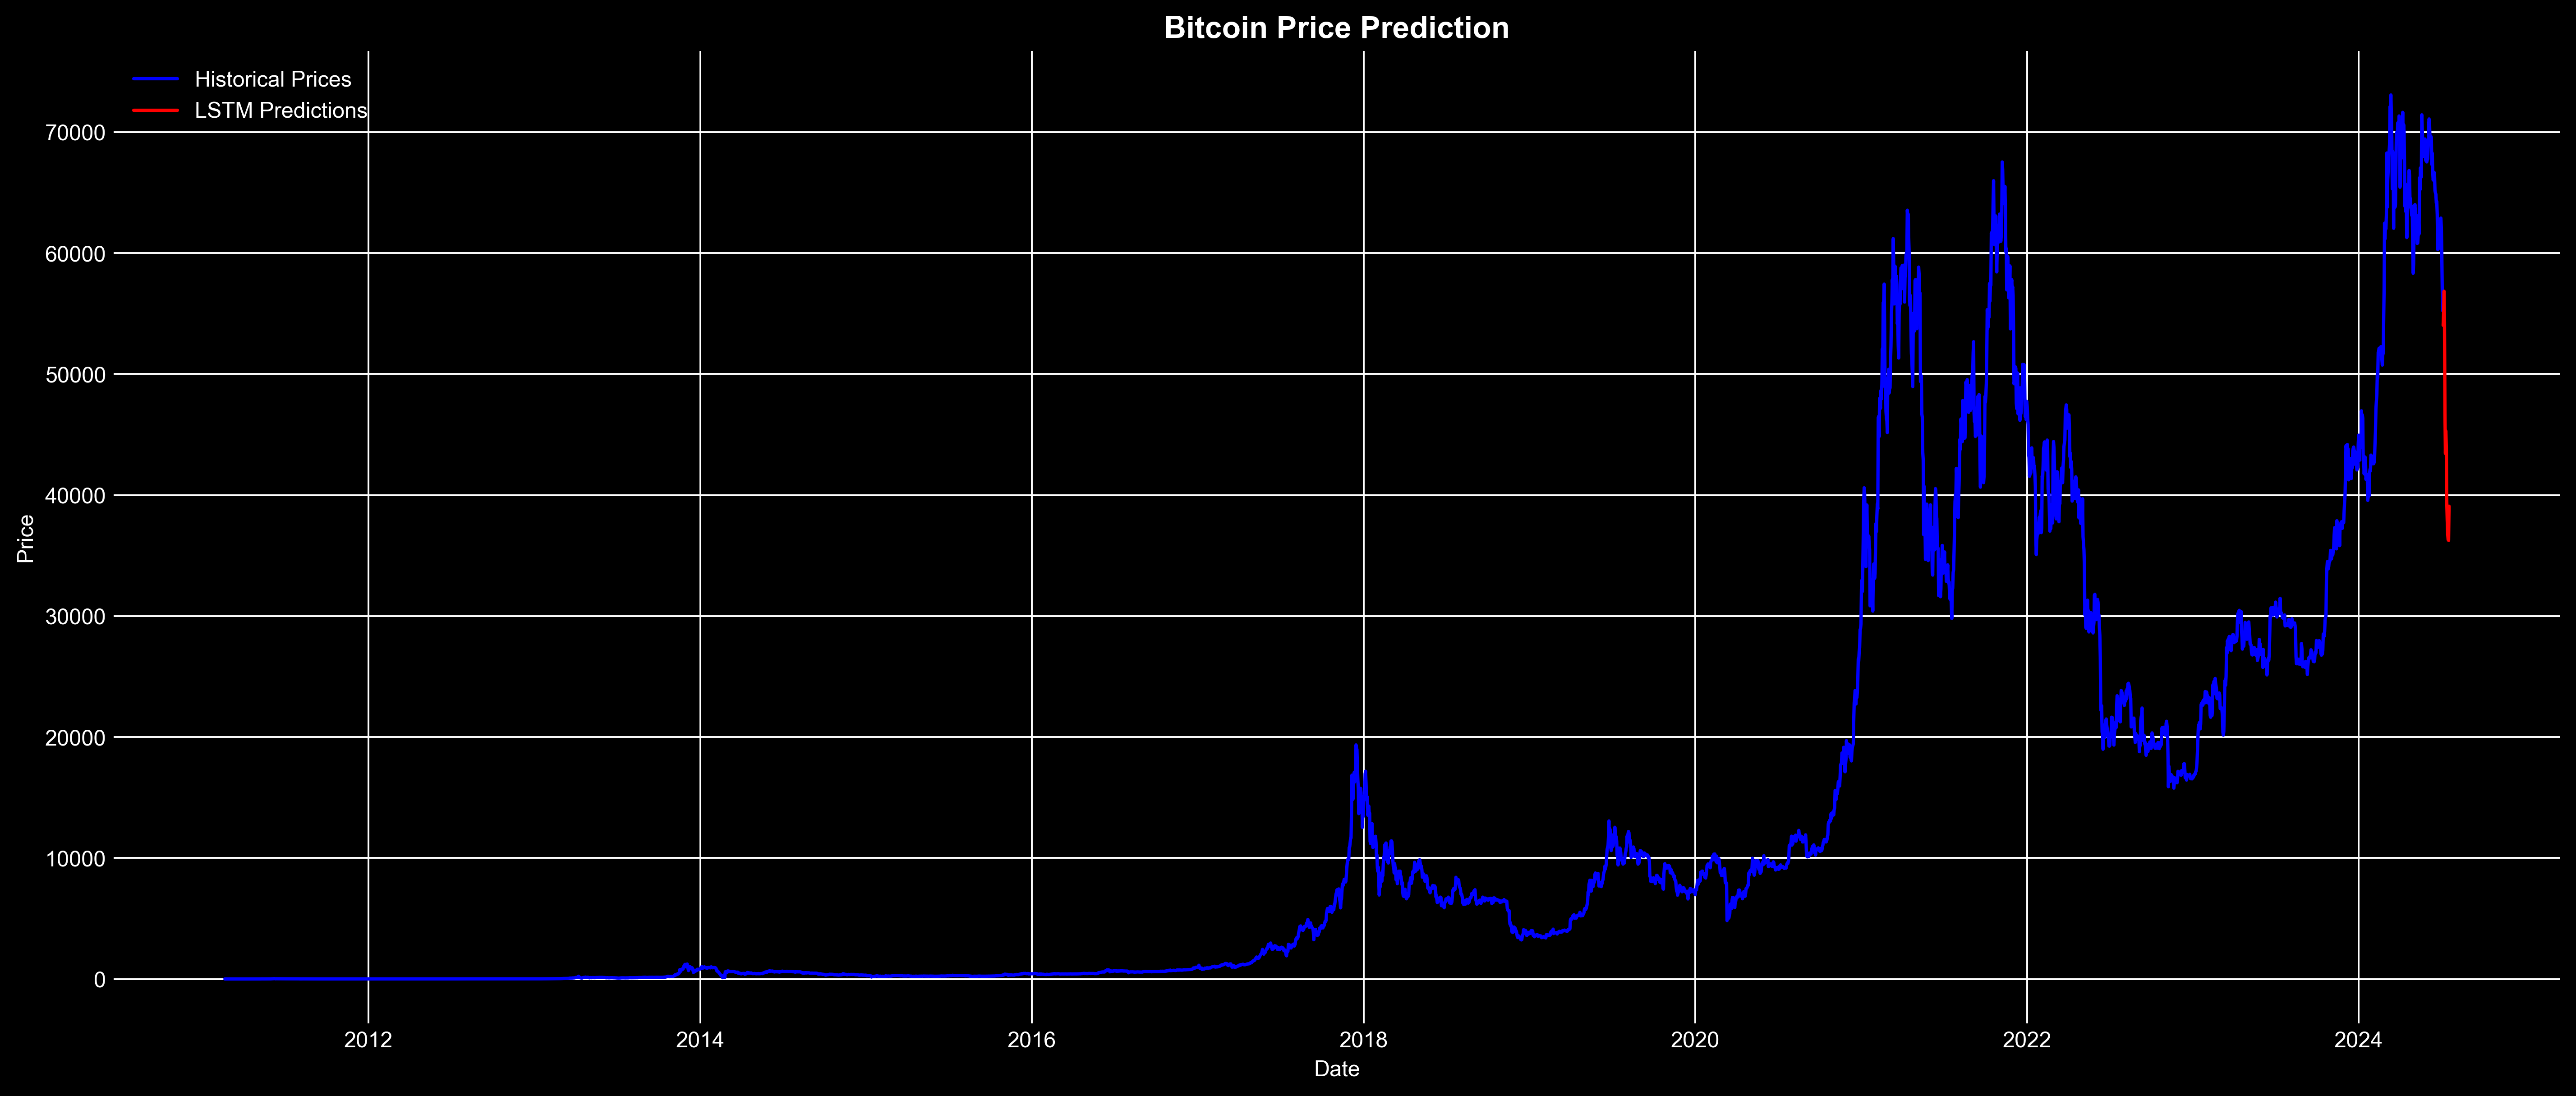

151/151 [==============================] - 1s 5ms/step
Training RMSE: 462.82


In [82]:
# Making a new dataset to train for lstm, where the current price is the target variable, so all other variables are shifted by 1 day   
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
btc_mo = lstm_df
# Handle infinity or large values by replacing them with NaN
btc_mo.replace([np.inf, -np.inf], np.nan, inplace=True)
btc_mo = btc_mo.dropna()
btc_mo['Date'] = pd.to_datetime(btc_mo['Date'])
btc_mo.set_index('Date', inplace=True)

# Select features for training
features = ['Price', 'Open', 'High', 'Low', 'Volume', 'pct_change', 'MA10',
       'MA10_td', 'MA30', 'MA30_td', 'MA50', 'MA50_td', '%K', '%K_td', '%D',
       '%D_td', 'RSI', 'RSI_td', 'Momentum', 'Momentum_td', 'EMA12', 'EMA26',
       'MACD', 'Signal', 'MACD_td', 'TP', 'SMA_TP', 'MD', 'CCI', 'CCI_td',
       'MA', 'STD', 'Upper_BB', 'Lower_BB', 'BB_td', 'ATR', 'OBV', 'OBV_td',
       'VWAP', 'VWAP_td', 'Fib_23.6', 'Fib_38.2', 'Fib_50.0', 'Fib_61.8',
       'Tenkan_sen', 'Kijun_sen', 'PMO', 'PMO_td', 'Volatility',
       'Volatility_Ratio', 'Volatility_Ratio_td', 'TSI', 'TSI_td']

data = btc_mo[features].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        seq = data[i:(i + seq_length)]
        if not np.isnan(seq).any() and not np.isnan(data[i + seq_length, 0]):
            X.append(seq)
            y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 24  # Number of time steps to look back
X, y = create_sequences(scaled_data, seq_length)

# Build the LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(seq_length, len(features))),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model on all available data
model.fit(X, y, batch_size=32, epochs=100, verbose=1)

# Predict the next 14 days
last_sequence = scaled_data[-seq_length:]
predicted_prices = []

for _ in range(14):
    next_pred = model.predict(last_sequence.reshape(1, seq_length, len(features)))
    predicted_prices.append(next_pred[0, 0])
    
    # Create a new row with the predicted price and placeholder values for other features
    new_row = np.zeros(len(features))
    new_row[0] = next_pred[0, 0]  # Set the predicted price
    
    # Update the last_sequence by removing the oldest entry and adding the new prediction
    last_sequence = np.vstack((last_sequence[1:], new_row))

# Inverse transform the predictions
predicted_prices = np.array(predicted_prices).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(np.hstack((predicted_prices, np.zeros((14, len(features)-1)))))[:, 0]

# Visualize the results
plt.figure(figsize=(20, 8), dpi=350)
plt.plot(btc_mo.index, btc_mo['Price'], label='Historical Prices', color='blue')
future_dates = pd.date_range(start=btc_mo.index[-1] + pd.Timedelta(days=1), periods=14)
plt.plot(future_dates, predicted_prices, label='LSTM Predictions', color='red')
plt.title('Bitcoin Price Prediction', fontweight='bold', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate RMSE for the training data
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(np.column_stack((train_predict, np.zeros((len(train_predict), len(features)-1)))))[:, 0]
y_actual = scaler.inverse_transform(np.column_stack((y.reshape(-1, 1), np.zeros((len(y), len(features)-1)))))[:, 0]
rmse = np.sqrt(mean_squared_error(y_actual, train_predict))
print(f"Training RMSE: {rmse:.2f}")

C:\Users\mulle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning:

Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.

C:\Users\mulle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning:

Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.

C:\Users\mulle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning:

Using a target size (torch.Size([32])) that is 

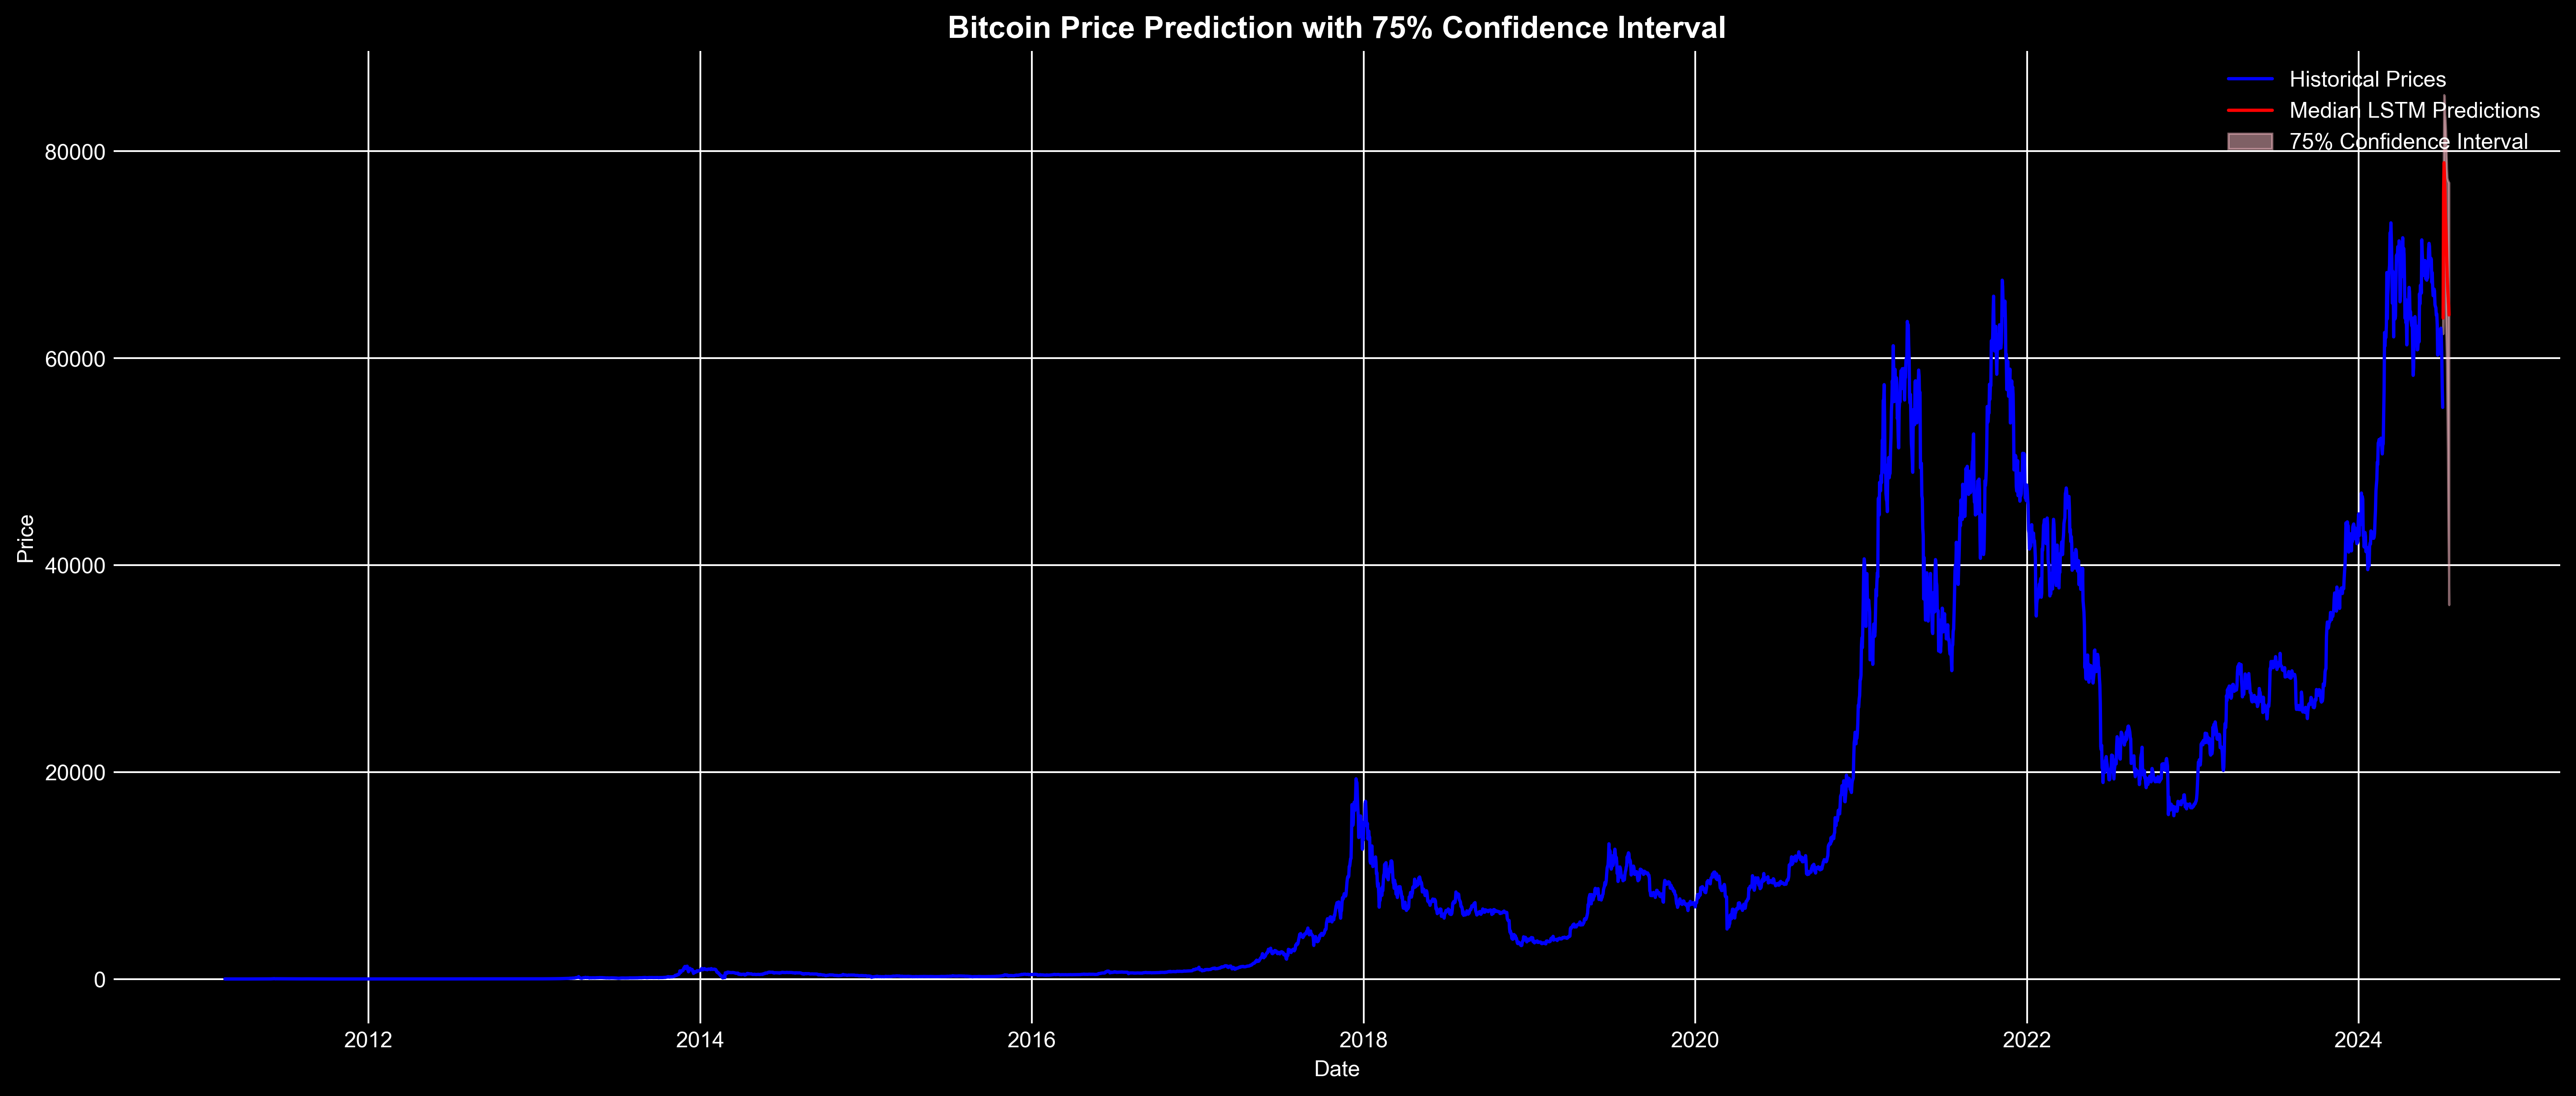

Training RMSE: 3496.19


In [83]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Select features for training
features = ['Price', 'Open', 'High', 'Low', 'Volume', 'pct_change', 'MA10',
       'MA10_td', 'MA30', 'MA30_td', 'MA50', 'MA50_td', '%K', '%K_td', '%D',
       '%D_td', 'RSI', 'RSI_td', 'Momentum', 'Momentum_td', 'EMA12', 'EMA26',
       'MACD', 'Signal', 'MACD_td', 'TP', 'SMA_TP', 'MD', 'CCI', 'CCI_td',
       'MA', 'STD', 'Upper_BB', 'Lower_BB', 'BB_td', 'ATR', 'OBV', 'OBV_td',
       'VWAP', 'VWAP_td', 'Fib_23.6', 'Fib_38.2', 'Fib_50.0', 'Fib_61.8',
       'Tenkan_sen', 'Kijun_sen', 'PMO', 'PMO_td', 'Volatility',
       'Volatility_Ratio', 'Volatility_Ratio_td', 'TSI', 'TSI_td']

data = btc_mo[features].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        seq = data[i:(i + seq_length)]
        if not np.isnan(seq).any() and not np.isnan(data[i + seq_length, 0]):
            X.append(seq)
            y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps to look back
X, y = create_sequences(scaled_data, seq_length)

# Convert data to PyTorch tensors
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X = torch.tensor(X, dtype=torch.float32).to(device)
y = torch.tensor(y, dtype=torch.float32).to(device)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(1, x.size(0), self.hidden_layer_size).to(device)
        c_0 = torch.zeros(1, x.size(0), self.hidden_layer_size).to(device)
        _, (hn, _) = self.lstm(x, (h_0, c_0))
        out = self.linear(hn[-1])
        return out

input_size = len(features)
hidden_layer_size = 50
output_size = 1

model = LSTMModel(input_size, hidden_layer_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, X, y, epochs=100, batch_size=32):
    model.train()
    for epoch in range(epochs):
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

# Run the model multiple times and store predictions
n_bootstraps = 100
predictions = []

for i in range(n_bootstraps):
    model = LSTMModel(input_size, hidden_layer_size, output_size).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    train_model(model, X, y, epochs=100, batch_size=32)
    
    # Predict the next 14 days
    last_sequence = torch.tensor(scaled_data[-seq_length:], dtype=torch.float32).unsqueeze(0).to(device)
    predicted_prices = []

    for _ in range(14):
        next_pred = model(last_sequence)
        predicted_prices.append(next_pred.item())
        last_sequence = torch.roll(last_sequence, -1, dims=1)
        last_sequence[0, -1] = next_pred

    # Inverse transform the predictions
    predicted_prices = scaler.inverse_transform(np.column_stack((predicted_prices, np.zeros((14, len(features)-1)))))[:, 0]
    predictions.append(predicted_prices)

predictions = np.array(predictions)

# Calculate 75% confidence intervals
lower_bound = np.percentile(predictions, 12.5, axis=0)
upper_bound = np.percentile(predictions, 87.5, axis=0)
median_prediction = np.median(predictions, axis=0)

# Slice the last 30 days of btc_mo DataFrame
btc_mo_last_30_days = btc_mo.iloc[-30:]

# Visualize the results
plt.figure(figsize=(20, 8), dpi=350)
plt.plot(btc_mo_last_30_days.index, btc_mo_last_30_days['Price'], label='Historical Prices', color='blue')
future_dates = pd.date_range(start=btc_mo.index[-1] + pd.Timedelta(days=1), periods=14)
plt.plot(future_dates, median_prediction, label='Median LSTM Predictions', color='red')
plt.fill_between(future_dates, lower_bound, upper_bound, color='pink', alpha=0.5, label='75% Confidence Interval')
plt.title('Bitcoin Price Prediction with 75% Confidence Interval', fontweight='bold', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate RMSE for the training data
model.eval()
with torch.no_grad():
    train_predict = model(X).cpu().numpy()
    train_predict = scaler.inverse_transform(np.column_stack((train_predict, np.zeros((len(train_predict), len(features)-1)))))[:, 0]
    y_actual = scaler.inverse_transform(np.column_stack((y.cpu().numpy().reshape(-1, 1), np.zeros((len(y), len(features)-1)))))[:, 0]
    rmse = np.sqrt(mean_squared_error(y_actual, train_predict))
    print(f"Training RMSE: {rmse:.2f}")


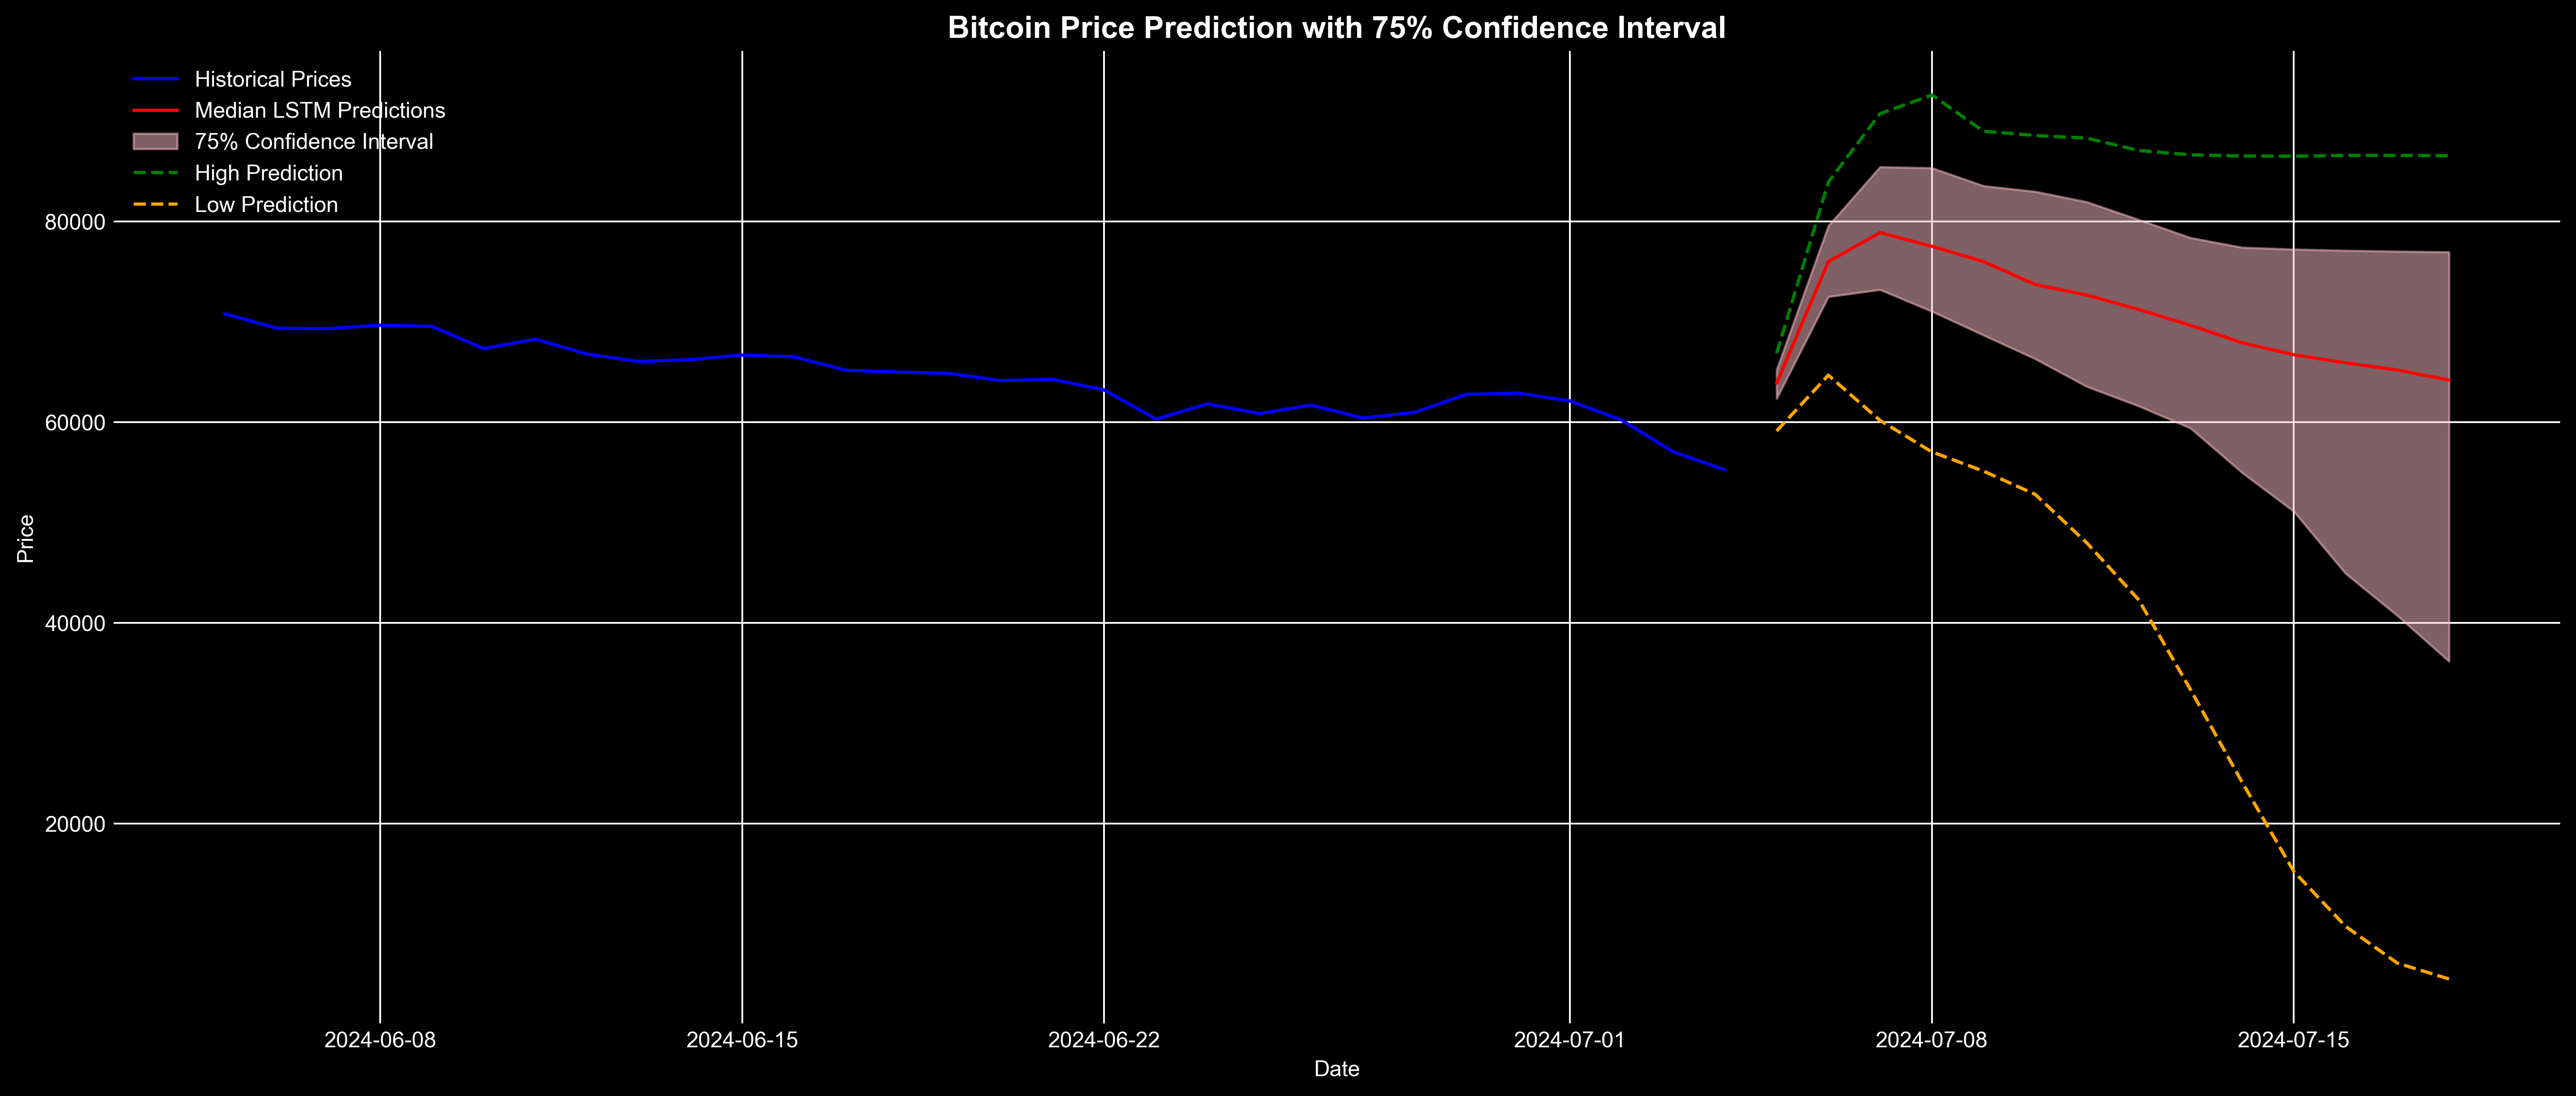

In [86]:
# Calculate high and low predictions
high_prediction = np.max(predictions, axis=0)
low_prediction = np.min(predictions, axis=0)

# Slice the last 30 days of btc_mo DataFrame
btc_mo_last_30_days = btc_mo.iloc[-30:]

# Visualize the results
plt.figure(figsize=(20, 8), dpi=350)
plt.plot(btc_mo_last_30_days.index, btc_mo_last_30_days['Price'], label='Historical Prices', color='blue')

# Create future dates for the prediction
future_dates = pd.date_range(start=btc_mo.index[-1] + pd.Timedelta(days=1), periods=14)

plt.plot(future_dates, median_prediction, label='Median LSTM Predictions', color='red')
plt.fill_between(future_dates, lower_bound, upper_bound, color='pink', alpha=0.5, label='75% Confidence Interval')

# Plot high and low predictions
plt.plot(future_dates, high_prediction, label='High Prediction', color='green', linestyle='--')
plt.plot(future_dates, low_prediction, label='Low Prediction', color='orange', linestyle='--')

plt.title('Bitcoin Price Prediction with 75% Confidence Interval', fontweight='bold', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()